# Census Income Prediction

Project Description


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteriseat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
tics of the population. People with similar demographic characteristics should have similar weights. 


# Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
data_cen = pd.read_csv(r"C:\Users\Premium\Downloads\census_income.csv")

In [3]:
#listing the dataset
data_cen.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
data_cen.shape

(32560, 15)

There are 32560 rows and 15 columns

In [5]:
data_cen.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Statistical Analysis

In [6]:
data_cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data_cen.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# checking for null values

In [7]:
# Check null values
data_cen.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
#there are no null values present in the given dataset

In [12]:
#checking '?' in our dataset
data_cen.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

From above we can see that there no missing values are present in our dataset, but instead missing values are present in the form of '?', So we should replace this '?' with np.nan

In [13]:
data_cen=data_cen.replace(' ?',np.NaN)

In [14]:
data_cen.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
#We have sucessfully replaced ? with np.nan values

In [16]:
#check if any whitespace, 'NA' or '-' exist in dataset.
data_cen.isin([' ','NA','-']).sum().any()



False

In [17]:
#drop duplicated entry from dataset before checking null values.
data_cen.drop_duplicates(keep='last', inplace=True)

In [18]:
data_cen.shape

(32536, 15)

# Checking missing values using Heatmap

<AxesSubplot:>

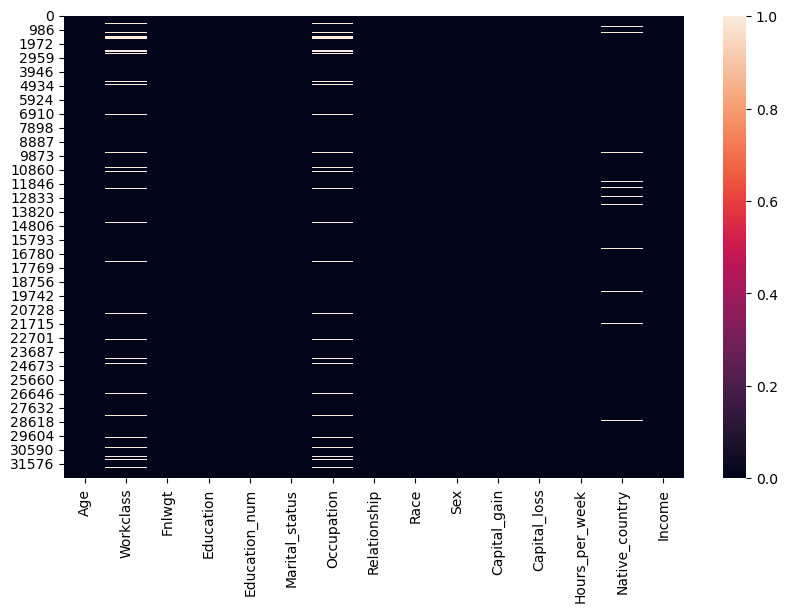

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data_cen.isnull())

here we can clearly see there are few missing values under workclass,occupation and native_country

# Exploratory Data Analysis

# Univariate & BiVariate Analysis

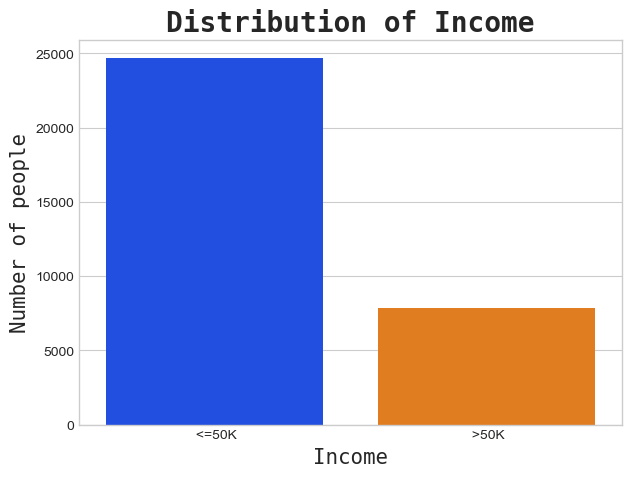

In [21]:
#Craeting a bar plot for our target variable"Income"

income = data_cen['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

The distribution of the targetvariable income, we would find that the people with less than 50K annual income are around 75% and the no. of people making more than 50K is around 25%.

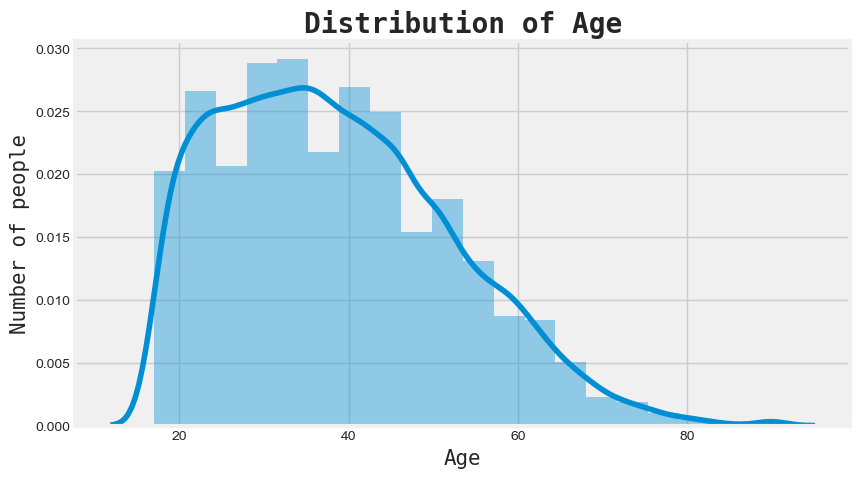

In [22]:
# Creating a distribution plot for 'Age'

age = data_cen['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(data_cen['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

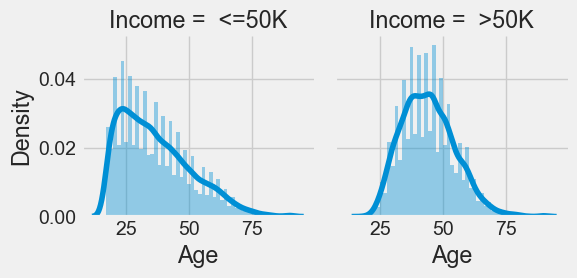

In [25]:
# Distribution of age with income 

axis= sns.FacetGrid(data_cen,col='Income')
axis.map(sns.distplot,'Age')
plt.show()


From the distribution we can clearly tell the maximum number of people earning more than 50k per year belong to age group 30 to 55 when compared wity young age and older age people.

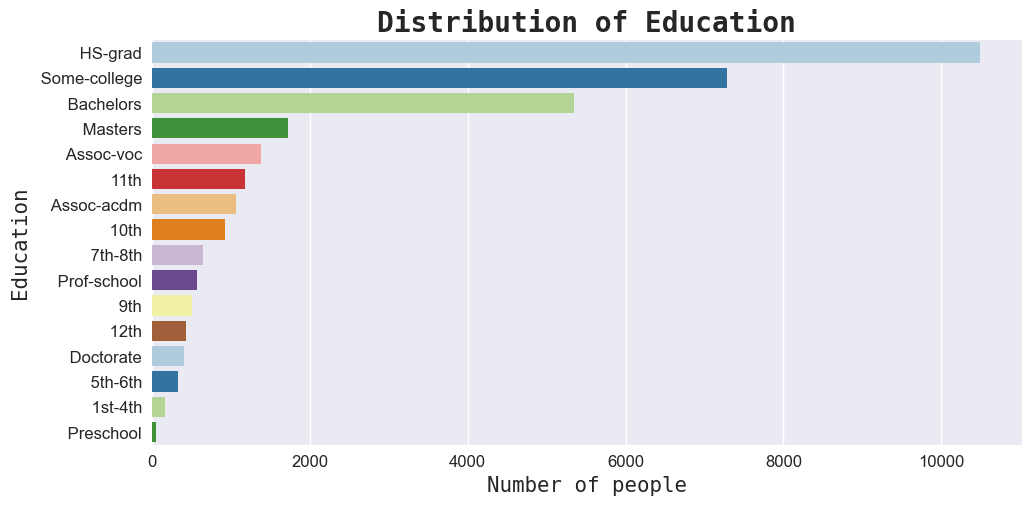

In [26]:
# Creating a barplot for 'Education'

edu = data_cen['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

From this distibution we can easily say that the more number of people who earns more income comes under HS-grade education backgroun followed by some colllege degree.

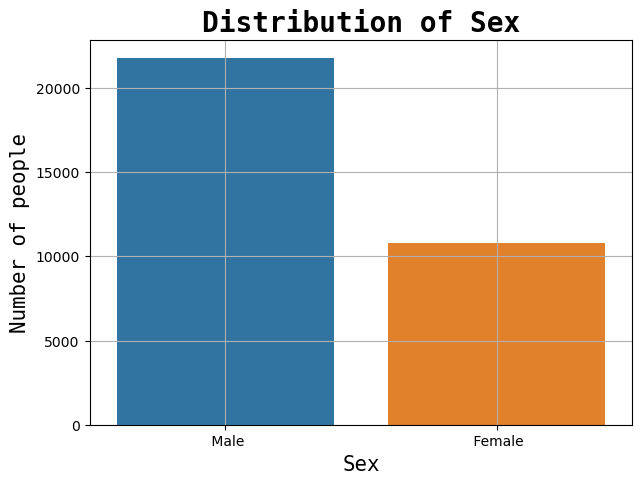

In [27]:
# Creating a barplot for 'Sex'

sex = data_cen['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

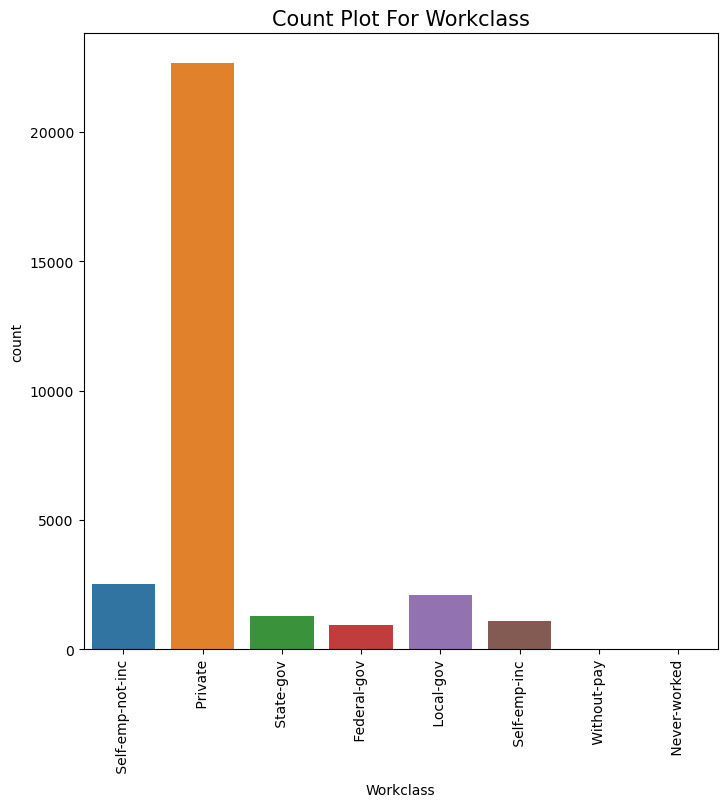

In [28]:
# Countplot for workclass column

plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data_cen['Workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

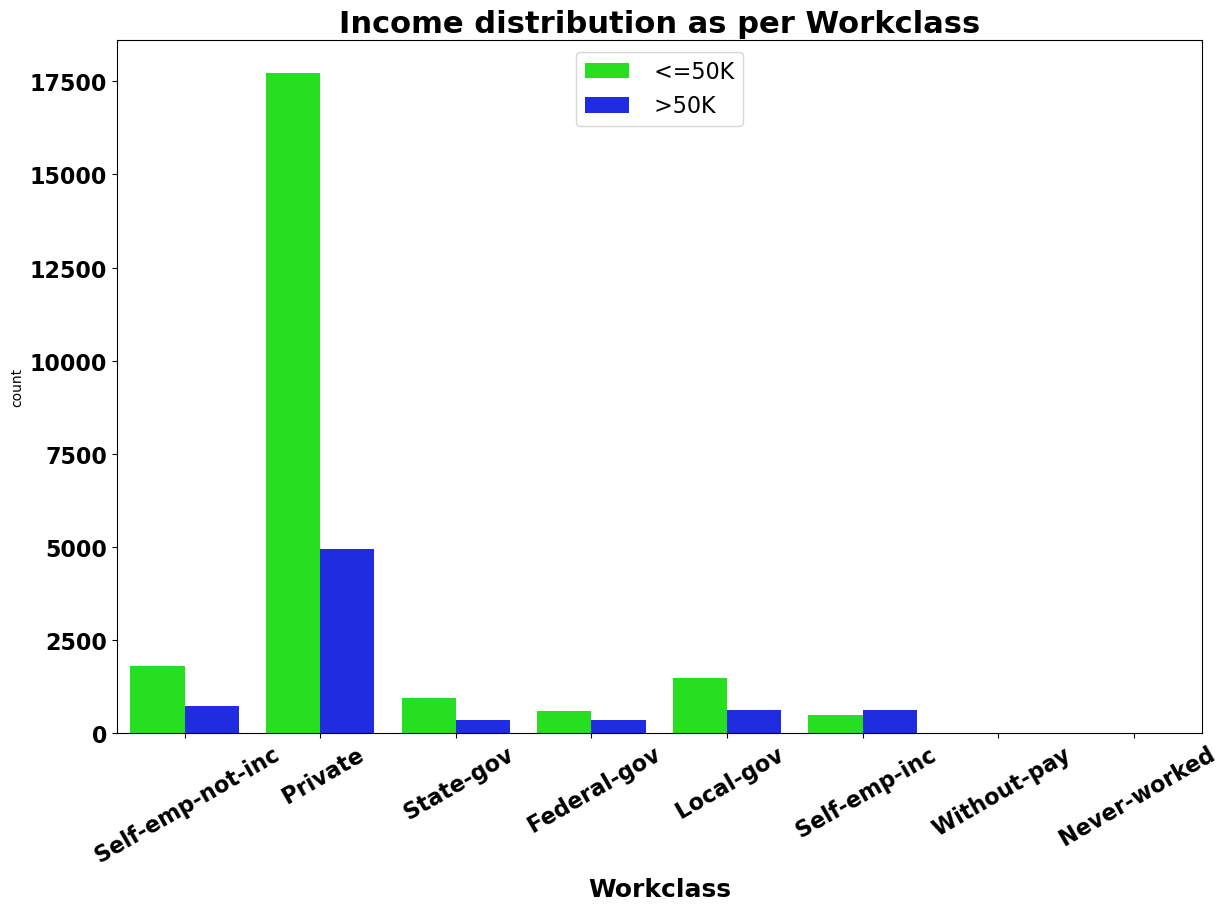

In [29]:
#Count plot for Income distribution as per Workclass
 
plt.figure(figsize=(14,9))
p = sns.countplot(data_cen['Workclass'], hue=data_cen['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


75 % people belongs to Private sector followed by Self Emplyoed.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

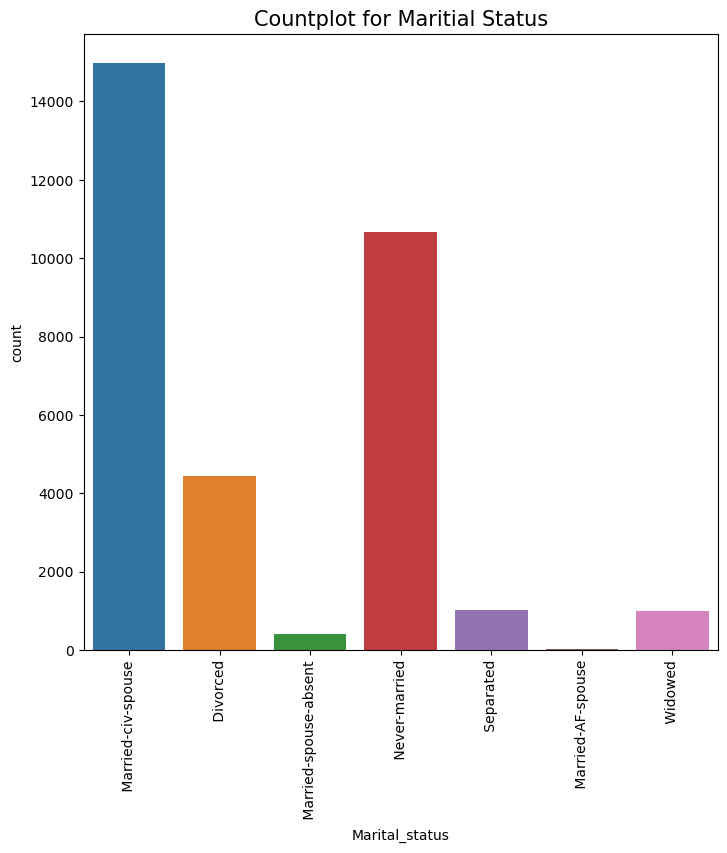

In [30]:
# Countplot for Maritial Status

plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data_cen['Marital_status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Countplot for Race Per Class')

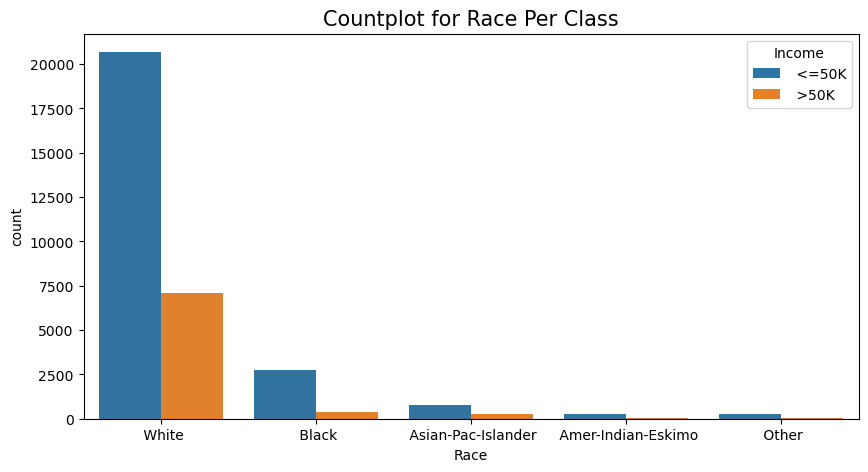

In [31]:
# Distribution for Race Vs Income

plt.figure(figsize=[10,5])
sns.countplot(data_cen['Race'], hue=data_cen['Income'])
plt.title('Countplot for Race Per Class', fontsize = 15)

We can clearly see that major income is from white  people when compared with other races.


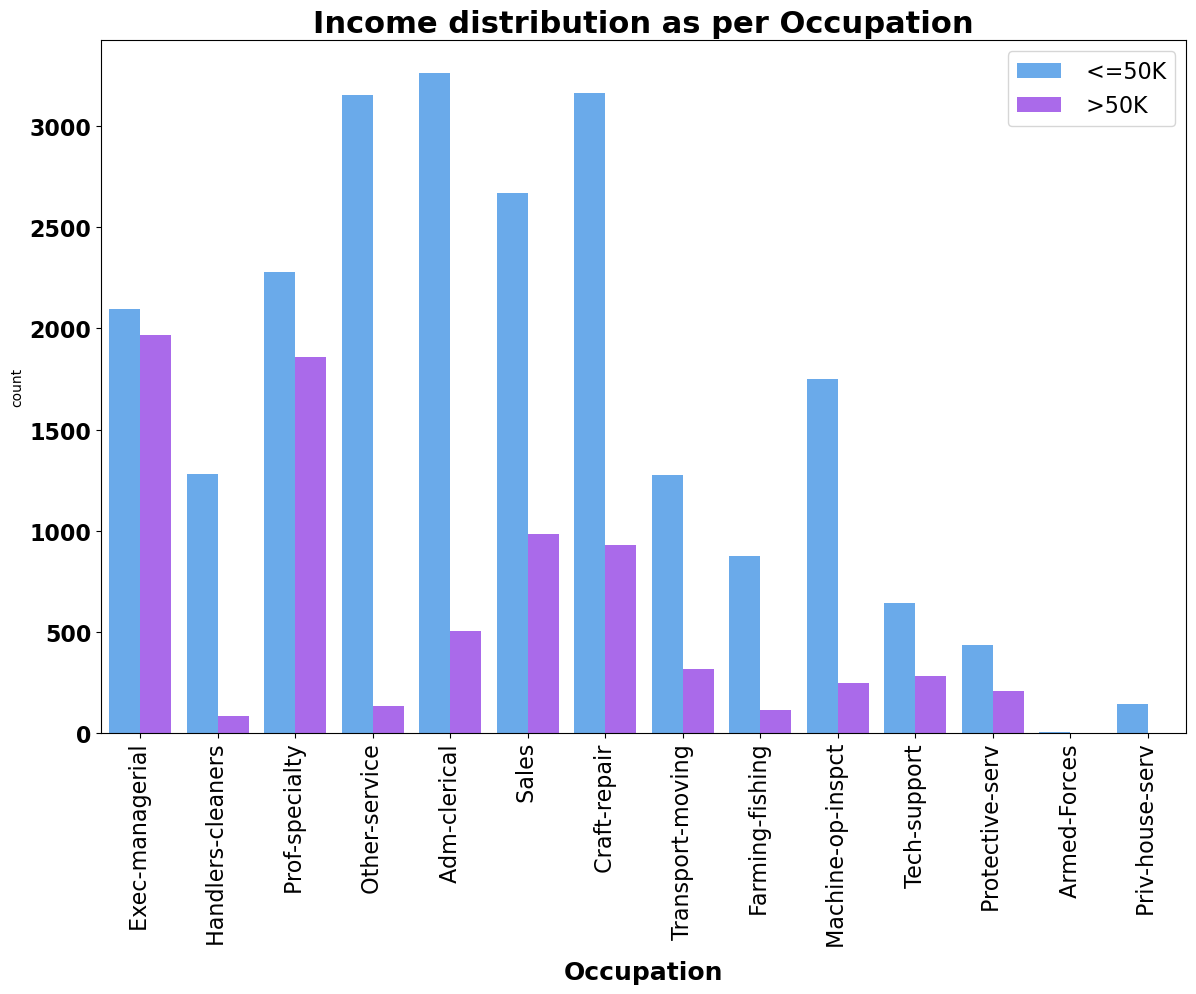

In [32]:
# Distribution of Occupation Vs Income 

plt.figure(figsize=(14,9))
p = sns.countplot(data_cen['Occupation'], hue=data_cen['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

Exec-managerial role and Prof_speciality are equally likely to earn more than 50K dollars an year followed by sales.



Text(0.5, 1.0, 'Distribution plot for hours per week')

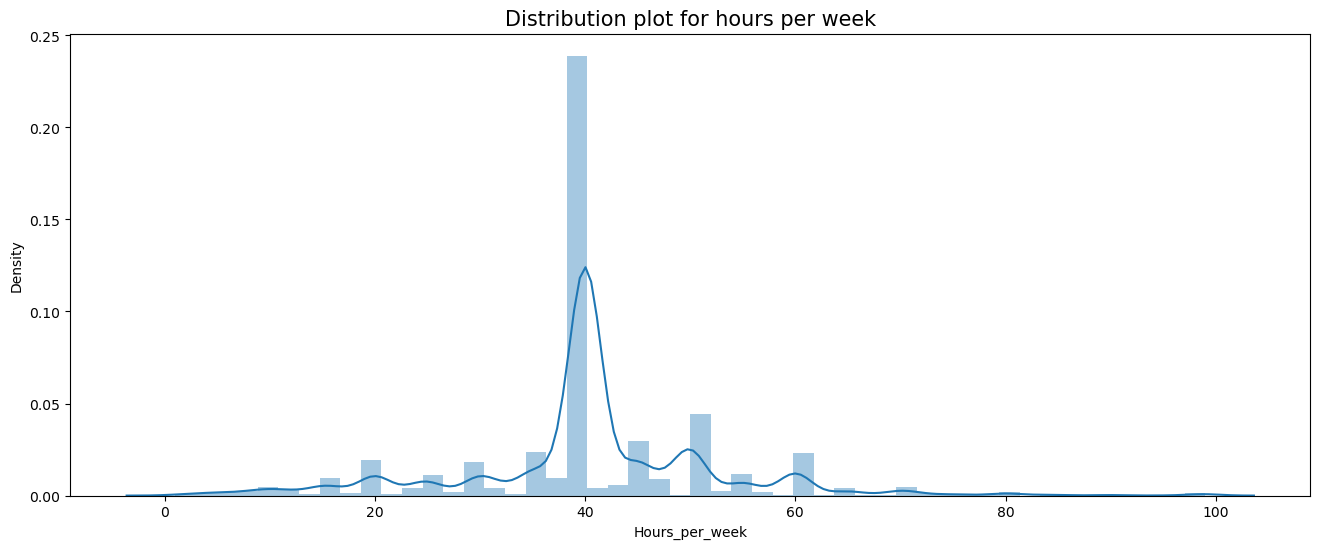

In [33]:
# Distribution plot for hours per week column

plt.figure(figsize=[16,6])
sns.distplot(data_cen['Hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

In this dataset most of the people work 30 to 40 hours per week

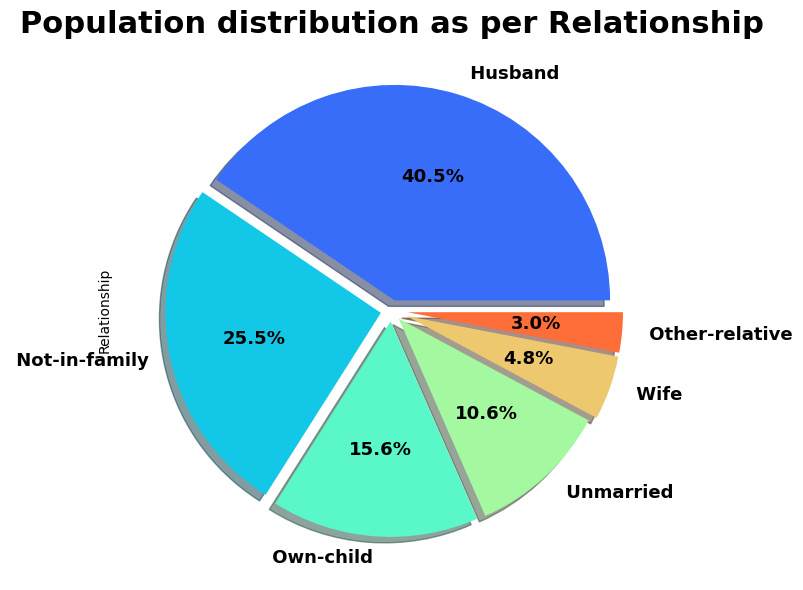

In [35]:
# Distribution of Relationship Vs Income

plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(9,6))
data_cen['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

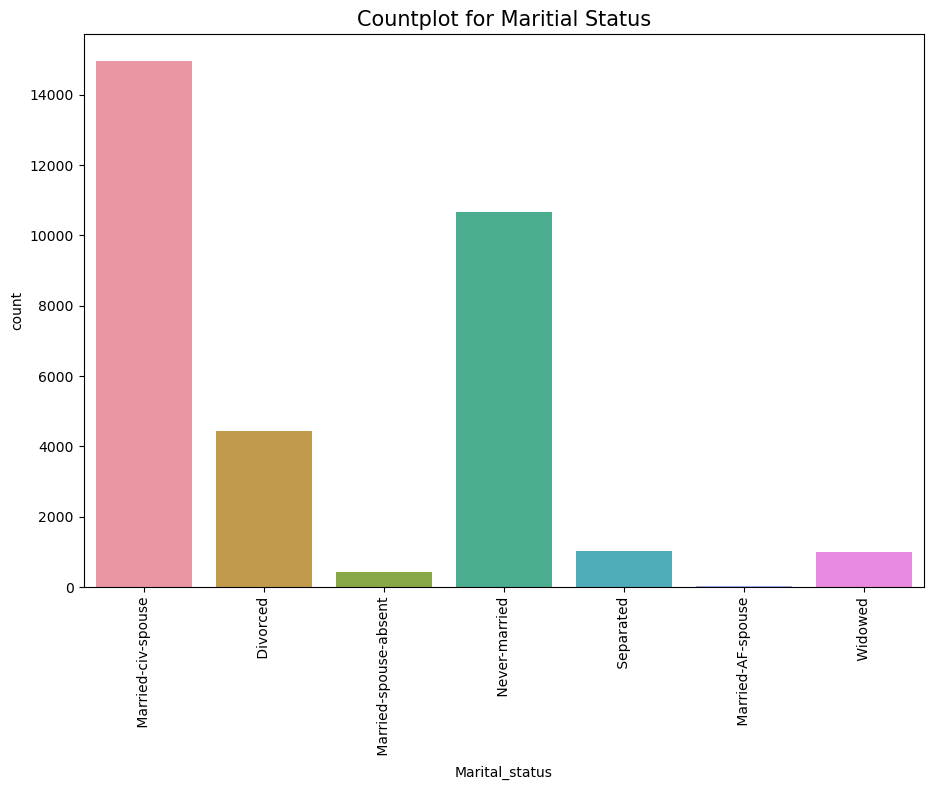

In [36]:
# Countplot for Maritial Status

plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data_cen['Marital_status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

Most of the people whose annual income is more than 50K, their marital status is married.

# Encoding Catagorical Variables

In [39]:
# Separating numerical and categorical variable

Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

 # Using Label Encoder on categorical variable
    
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    data_cen[i] = le.fit_transform(data_cen[i])
data_cen.head()

# Correlation Heatmap

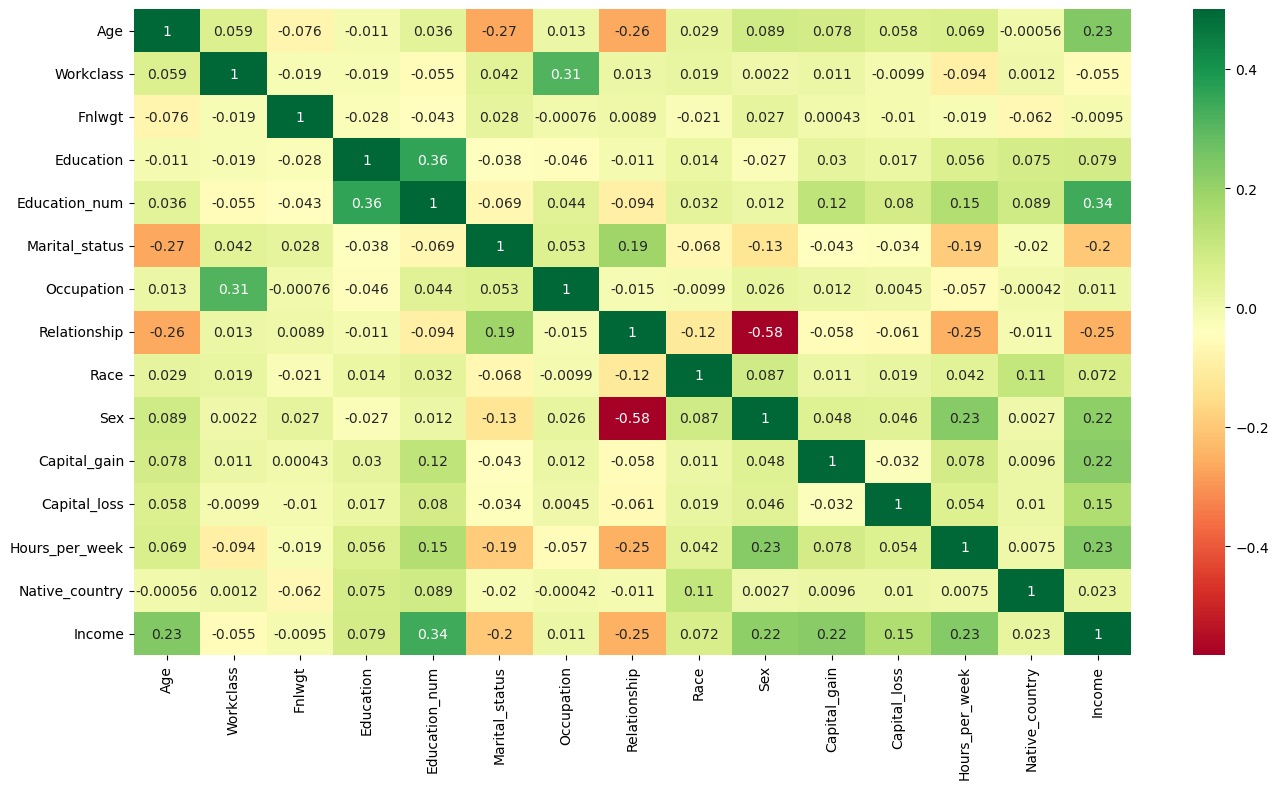

In [42]:
# Correlation Heatmap

plt.figure(figsize=[14,8])
sns.heatmap(data_cen.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

Education,education_num are highly correlated with  the target variable

After checking Mulitcollinearity we will decide to drop the poorly correlated features

# To check Multicollinearity between features using variance_inflation_factor

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(data_cen.values,i) for i in range(data_cen.shape[1])]
vif['Features']= data_cen.columns
vif

,VIF,Features
0,9.062265,Age
1,6.117206,Workclass
2,4.040656,Fnlwgt
3,9.256069,Education
4,19.985735,Education_num
5,4.172409,Marital_status
6,3.579054,Occupation
7,2.706546,Relationship
8,17.693036,Race
9,4.494587,Sex


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other.

Another way to address Multicollinerity is to Scale Data and then apply PCA.

In [44]:
data_cen.Income.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

# Balancing using SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
# Splitting data in target and dependent feature
X = data_cen.drop(['Income'], axis =1)
Y = data_cen['Income']

In [47]:
# Oversampleing using SMOTE Techniques

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [48]:
Y.value_counts()

0    24697
1    24697
Name: Income, dtype: int64

class imbalanced problem has been succesfully resolved.

# Standard Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

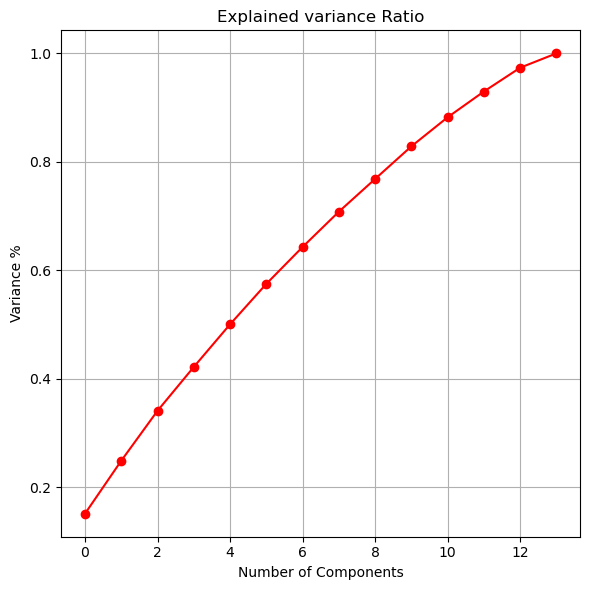

In [51]:
from sklearn.decomposition import PCA
pca = PCA()

#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

 we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction.

In [52]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [53]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Model Building and Prediction

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)

In [56]:
X_train.shape

(34575, 9)

In [57]:
X_test.shape

(14819, 9)

In [58]:
Y_train.shape

(34575,)

In [59]:
Y_test.shape

(14819,)

# Logistic Regression Evaluation

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7667858829880558


Confusion matrix of Logistics Regression : 
 [[5456 1888]
 [1568 5907]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      7344
           1       0.76      0.79      0.77      7475

    accuracy                           0.77     14819
   macro avg       0.77      0.77      0.77     14819
weighted avg       0.77      0.77      0.77     14819



# Applying other classification algorithm

In [61]:
model=[ SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        

In [62]:
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8167892570348877


Confusion matrix : 
 [[5543 1801]
 [ 914 6561]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      7344
           1       0.78      0.88      0.83      7475

    accuracy                           0.82     14819
   macro avg       0.82      0.82      0.82     14819
weighted avg       0.82      0.82      0.82     14819



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7360820568189487


Confusion matrix : 
 [[5554 1790]
 [2121 5354]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      7344
           1       0.75      0.72      0.73      7475

    accuracy                           0.74     14819
   macro avg       0.74      0.74      0.74     14819
weighted avg       0.74      0.74      0.74     

# CrossValidation

In [65]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

In [66]:
for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.75230286 0.76444984 0.76870129 0.77173803 0.77303098]
Mean Score : 0.7660446002829827
Std deviation : 0.00747878521456242




Cross Validation Score SVC() :

Score : [0.77922867 0.80706549 0.82417249 0.82275534 0.8250658 ]
Mean Score : 0.8116575577650125
Std deviation : 0.017505914893217366




Cross Validation Score GaussianNB() :

Score : [0.73074198 0.73651179 0.73387995 0.73610689 0.73456165]
Mean Score : 0.7343604527108443
Std deviation : 0.002051489466377846




Cross Validation Score DecisionTreeClassifier() :

Score : [0.72173297 0.75382124 0.78428991 0.78641563 0.78467301]
Mean Score : 0.7661865507239748
Std deviation : 0.025328712070264967




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.76657556 0.8034214  0.85049094 0.8434052  0.8501721 ]
Mean Score : 0.8228130412410085
Std deviation : 0.033097766997238695




Cross Validation Score RandomForestClassifier() :

Score : [0.78256909 0.82305

So as we try different Classification Alorithms and found that   "ExtraTreesClassifier" is Performed the best with an F1 score of 0.84 and Accuracy score of 0.84

I also Performed hyperparameter tuning on ExtraTreesClassifier and get the best tuned parameter.

# Hyper Parameter Tuning : GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [69]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.823 total time=   1.9s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.827 total time=   2.8s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.824 total time=   2.2s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.828 total time=   2.0s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [70]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_split': 3,
 'n_estimators': 150}

# Final Prediction Model

In [71]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8373034617720494


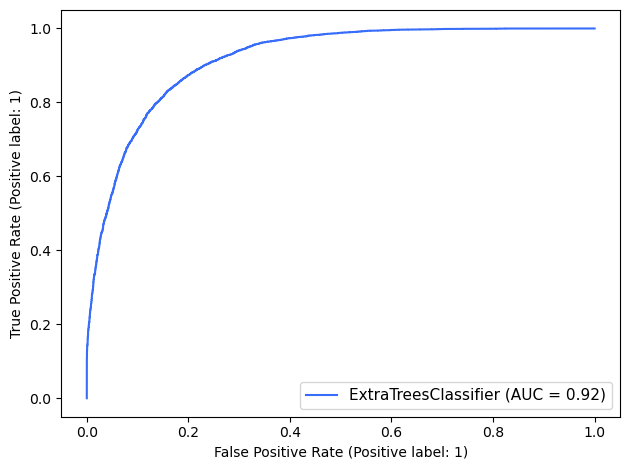

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8369417484570937


In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [72]:
import joblib
joblib.dump(Final_mod,'Census_Income.pkl')

['Census_Income.pkl']